#### Data preparation and search for correlations using the Pearson coefficient.

1. The data sample was prepared, which contains wind speed measurements at the south pole. Measurements were taken once an hour.

2. The average event rate per hour for the ARA02 detector was calculated. The detector station located near(ish) the Meteorological observatory.

3. The Pearson coefficient for wind speed and event rate samples was calculated for data collected for 2015-2017. It showed a lack of correlation between these two quantities.

4. It was found that the Pearson coefficient increases during the times of severe storm. Even though the local correlation is not enough to conclude that the increase in the event rate is caused by the triboelectric effect, the data for this period deserves detailed consideration.


Text(0.5, 1.0, 'wind speed distribution 2015-2017 South pole, [m/s]')

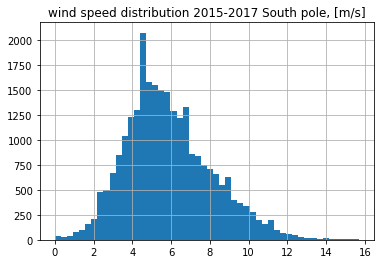

In [26]:
from pandas import DataFrame, read_csv
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv('2015_2017_wind_speed.txt', sep = "\s+", header = None)
df.drop(columns=[ 5, 7, 8, 9, 10, 11, 12, 13],inplace=True)
df.columns=['station','year','month','day','hour','wind']
df.drop(df.loc[df['wind']==-999.9].index, inplace=True)
df.drop(df.loc[df['wind']==-99.9].index, inplace=True)
df.hist(column='wind', bins=50)
plt.title('wind speed distribution 2015-2017 South pole, [m/s]')

Text(0.5, 1.0, 'Wind speed vs time 2015-2017 South pole')

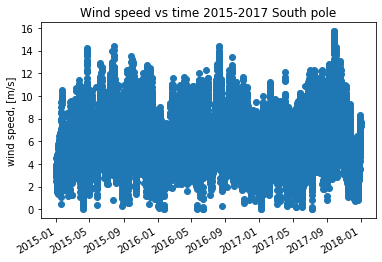

In [27]:
df.insert(0, 'Date', pd.to_datetime(df[['year', 'month', 'day', 'hour']]))
df = df.drop(columns=['year', 'month', 'day','hour'])
fig, ax = plt.subplots()
ax.plot_date(df.Date,df.wind)
fig.autofmt_xdate()
ax.set(xlabel='', ylabel='wind speed, [m/s]')
ax.set_title('Wind speed vs time 2015-2017 South pole')
#ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2017, 6, 8)])

Text(0.5, 1.0, 'event rate distribution 2015-2017 ARA02, [Hz]')

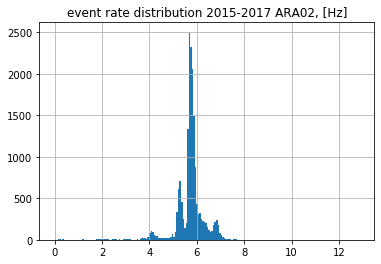

In [28]:
rate = pd.read_csv('rate_ara2_2015.txt', sep = "\s+", header = None)
rate.columns=['run_num','event_num','rate','utime']
rate.drop(rate.loc[rate['rate']==0].index, inplace=True)
rate['utime']  = pd.to_datetime(rate['utime'],unit='s')
rate['utime'] = rate['utime'].dt.floor('h')
rate.hist(column='rate', bins=200)
plt.title('event rate distribution 2015-2017 ARA02, [Hz]')

Text(0.5, 1.0, 'Wind speed vs time 2015-2017 ARA02 ')

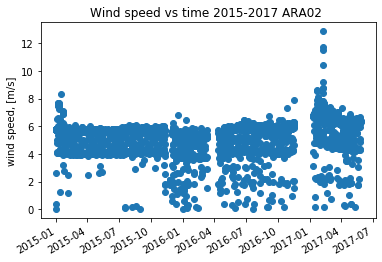

In [29]:
fig, ax = plt.subplots()
ax.plot_date(rate.utime,rate.rate)
fig.autofmt_xdate()
ax.set(xlabel='', ylabel='wind speed, [m/s]')
ax.set_title('Wind speed vs time 2015-2017 ARA02 ')

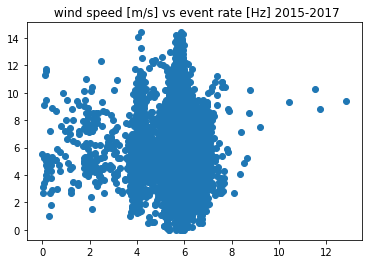

Pearsons correlation: 0.021


In [6]:
from numpy import cov
from scipy.stats import pearsonr
df_merge_col = pd.merge(df, rate, left_on='Date', right_on='utime')
plt.scatter(df_merge_col['rate'],df_merge_col['wind'])
plt.title(' wind speed [m/s] vs event rate [Hz] 2015-2017')
plt.show()
corr, _ = pearsonr(df_merge_col['rate'], df_merge_col['wind'])
print('Pearsons correlation: %.3f' % corr)

It is known that a partial correlation between wind speed and event rates has been observed by ARIANNA. Wind speeds above 10 m/s only have resulted in elevated event rates. Thus, since ARIANNA antennas are closer to the surface, we do not expect to see any corellation for the wind speeds below 10 m/s. 

I looked for times when there were a storms ( higher than 10 m/s ) and elevation in the event rate happened at the same time.

I decided to consider only event rates which are one sigma greater than the mean of event rate distribution. (this is debatable)

Text(0.5, 1.0, 'wind speed distribution, [m/s]')

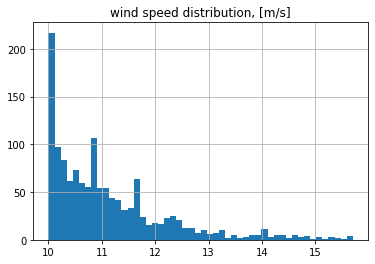

In [7]:
df.drop(df.loc[df['wind']<10].index, inplace=True)
df.hist(column='wind', bins=50)
plt.title('wind speed distribution, [m/s]')

In [14]:
print('mean of event',rate[['rate']].mean())
print('std of event',rate[['rate']].std())
print('the threshold for event', rate[['rate']].mean()+rate[['rate']].std())

mean of event rate    5.714425
dtype: float64
std of event rate    0.662219
dtype: float64
the threshold for event rate    6.376644
dtype: float64


In [16]:
rate.drop(rate.loc[rate['rate']<6.376644].index, inplace=True)
df_merge_col1 = pd.merge(df, rate, left_on='Date', right_on='utime')
df_merge_col1

,Date,station,wind,run_num,event_num,rate,utime
0,2017-02-08 00:00:00,SPO,10.3,8641,153372,11.508611,2017-02-08 00:00:00
1,2017-02-08 02:00:00,SPO,10.2,8642,4191,8.788056,2017-02-08 02:00:00
2,2017-02-08 03:00:00,SPO,10.1,8642,29830,7.121667,2017-02-08 03:00:00
3,2017-02-09 13:00:00,SPO,10.8,8648,120563,7.570000,2017-02-09 13:00:00
4,2017-02-09 14:00:00,SPO,11.2,8648,147072,7.363333,2017-02-09 14:00:00
5,2017-02-09 17:00:00,SPO,10.4,8651,27721,7.596944,2017-02-09 17:00:00
6,2017-02-09 18:00:00,SPO,10.4,8651,55432,7.697222,2017-02-09 18:00:00
7,2017-02-09 19:00:00,SPO,10.4,8651,81239,7.168333,2017-02-09 19:00:00
8,2017-02-09 20:00:00,SPO,10.8,8651,107539,7.305278,2017-02-09 20:00:00
9,2017-02-09 21:00:00,SPO,10.8,8651,134844,7.584444,2017-02-09 21:00:00


(736366.0, 736372.0)

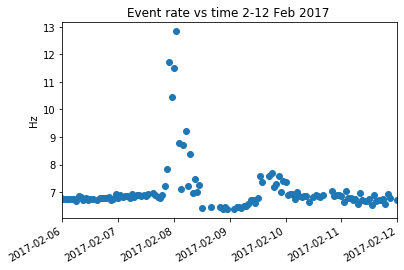

In [21]:
fig, ax = plt.subplots()
ax.plot_date(rate.utime,rate.rate)
fig.autofmt_xdate()
ax.set(xlabel='', ylabel='Hz')
ax.set_title('Event rate vs time 2-12 Feb 2017 ')
ax.set_xlim([datetime.date(2017, 2, 6), datetime.date(2017, 2, 12)])

(736366.0, 736372.0)

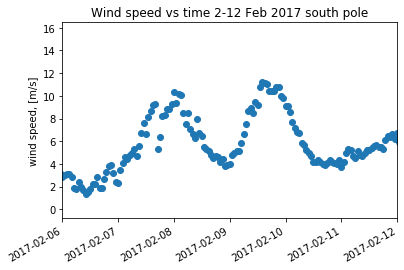

In [19]:
df = pd.read_csv('2015_2017_wind_speed.txt', sep = "\s+", header = None)
df.drop(columns=[ 5, 7, 8, 9, 10, 11, 12, 13],inplace=True)
df.columns=['station','year','month','day','hour','wind']
df.drop(df.loc[df['wind']==-999.9].index, inplace=True)
df.drop(df.loc[df['wind']==-99.9].index, inplace=True)
df.insert(0, 'Date', pd.to_datetime(df[['year', 'month', 'day', 'hour']]))
df = df.drop(columns=['year', 'month', 'day','hour'])
fig, ax = plt.subplots()
ax.plot_date(df.Date,df.wind)
fig.autofmt_xdate()
ax.set(xlabel='', ylabel='wind speed, [m/s]')
ax.set_title('Wind speed vs time 2-12 Feb 2017 south pole')
ax.set_xlim([datetime.date(2017, 2, 6), datetime.date(2017, 2, 12)])

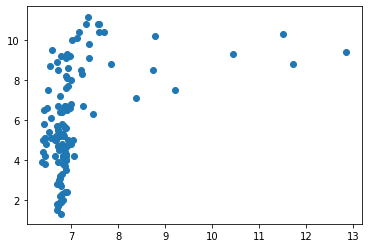

Pearsons correlation: 0.430


In [22]:
date1 = pd.Timestamp(datetime.date(2017, 2, 6))
date2 = pd.Timestamp(datetime.date(2017, 2, 12))
cond1 = df.Date > date1
cond2 = df.Date < date2

df.drop(df.loc[df['Date']<date1].index, inplace=True)
df.drop(df.loc[df['Date']>date2].index, inplace=True)
df_merge_col2 = pd.merge(df, rate, left_on='Date', right_on='utime')
df_merge_col2
plt.scatter(df_merge_col2['rate'],df_merge_col2['wind'])
plt.show()
ax.set_title('event rate [Hz] vs wind speed [m/s] 2015-2017')
corr, _ = pearsonr(df_merge_col2['rate'], df_merge_col2['wind'])
print('Pearsons correlation: %.3f' % corr)

The coefficient has increased significantly and it seems that there is a visual coincidence of the peaks of the event rate and the wind speed. 

Obviously, it cannot be said that correlations exist considering only a specific period of time and not considering everything else. But the coincidence is interesting and it worth to look deeper inside that particular time range and and look at waveforms.

